### Import Libraries

In [75]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## DATA UNDERSTANDING
Dataset source : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

### Attribute Information for Ecommerce Customer Churn Analysis and Prediction

| **Attribute**                   | **Data Type, Length**         | **Description**                                                                                           |
|---------------------------------|-------------------------------|-----------------------------------------------------------------------------------------------------------|
| **CustomerID**                  | Integer                           | Unique identifier for the customer                                                                        |
| **Churn**                       | Integer                       | Churn flag: 1 indicates the customer has churned, 0 indicates the customer has not churned                   |
| **Tenure**                      | Integer                       | Duration of the customer's relationship with the company (e.g., in months)                                  |
| **PreferredLoginDevice**        | Text                          | The device most frequently used by the customer for logging in (e.g., mobile, desktop)                        |
| **CityTier**                    | Integer                       | Classification of the customer's city (e.g., Tier 1, Tier 2, or Tier 3)                                      |
| **WarehouseToHome**             | Float                         | Distance from the warehouse to the customer's home (in kilometers)                                          |
| **PreferredPaymentMode**        | Text                          | The customer's preferred payment method (e.g., Cash on Delivery, Credit Card, e-wallet)                      |
| **Gender**                      | Text                          | Customer's gender (e.g., Male, Female)                                                                       |
| **HourSpendOnApp**              | Float                         | Number of hours the customer spends on the app/website per period                                            |
| **NumberOfDeviceRegistered**    | Integer                       | Total number of devices registered by the customer                                                          |
| **PreferedOrderCat**            | Text                          | The product category most frequently ordered by the customer in the last month                              |
| **SatisfactionScore**           | Integer                       | Customer satisfaction score (e.g., on a scale of 1-5)                                                       |
| **MaritalStatus**               | Text                          | Customer's marital status (e.g., Single, Married)                                                            |
| **NumberOfAddress**             | Integer                       | Number of addresses registered by the customer                                                               |
| **Complain**                    | Integer                       | Indicator if the customer raised any complaints in the last month (1 for Yes, 0 for No)                         |
| **OrderAmountHikeFromlastYear** | Float                         | Percentage increase in order amount compared to the previous year                                             |
| **CouponUsed**                  | Integer                       | Total number of coupons used by the customer in the last month                                                |
| **OrderCount**                  | Integer                       | Total number of orders placed by the customer in the last month                                               |
| **DaySinceLastOrder**           | Integer                       | Number of days since the customer's last order                                                                |
| **CashbackAmount**              | Float                         | Average cashback amount received by the customer in the last month                                              |


In [76]:
#load data set
file_path = 'C:\\Users\\EDITH\\Documents\\Python Scripts\\E Commerce Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [78]:
# Mengidentifikasi kolom numerik (tipe int64 dan float64)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Menghitung jumlah kolom numerik
jumlah_numeric_cols = len(numeric_cols)

# Mengidentifikasi kolom kategorikal (tipe object)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Menghitung jumlah kolom kategorikal
jumlah_categorical_cols = len(categorical_cols)

print("Kolom Numerik:", numeric_cols)
print("Kolom Kategorikal:", categorical_cols)
print("Jumlah Kolom Numerik:", jumlah_numeric_cols)
print("Jumlah Kolom Kategorikal:", jumlah_categorical_cols)

Kolom Numerik: ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Kolom Kategorikal: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Jumlah Kolom Numerik: 15
Jumlah Kolom Kategorikal: 5


## Data Cleaning

In this section, we will:
- Remove the `CustomerID` column since it only serves as a unique identifier and does not provide any predictive value.
- Identify and handle missing values present in the dataset.
- Ensure that the data is in a consistent and usable format for further analysis and machine learning modeling.

In [79]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CustomerID,int64,0,0.00,5630,"[51357, 53753]"
1,Churn,int64,0,0.00,2,"[1, 0]"
2,Tenure,float64,264,4.69,36,"[23.0, 24.0]"
3,PreferredLoginDevice,object,0,0.00,3,"[Computer, Phone]"
4,CityTier,int64,0,0.00,3,"[3, 2]"
5,WarehouseToHome,float64,251,4.46,34,"[20.0, 9.0]"
6,PreferredPaymentMode,object,0,0.00,7,"[UPI, CC]"
7,Gender,object,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,255,4.53,6,"[0.0, 3.0]"
9,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 2]"


In [80]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [81]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Churn,int64,0,0.00,2,"[0, 1]"
1,Tenure,float64,264,4.69,36,"[23.0, 17.0]"
2,PreferredLoginDevice,object,0,0.00,3,"[Phone, Computer]"
3,CityTier,int64,0,0.00,3,"[2, 3]"
4,WarehouseToHome,float64,251,4.46,34,"[32.0, 31.0]"
5,PreferredPaymentMode,object,0,0.00,7,"[COD, UPI]"
6,Gender,object,0,0.00,2,"[Male, Female]"
7,HourSpendOnApp,float64,255,4.53,6,"[nan, 3.0]"
8,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 4]"
9,PreferedOrderCat,object,0,0.00,6,"[Mobile Phone, Fashion]"


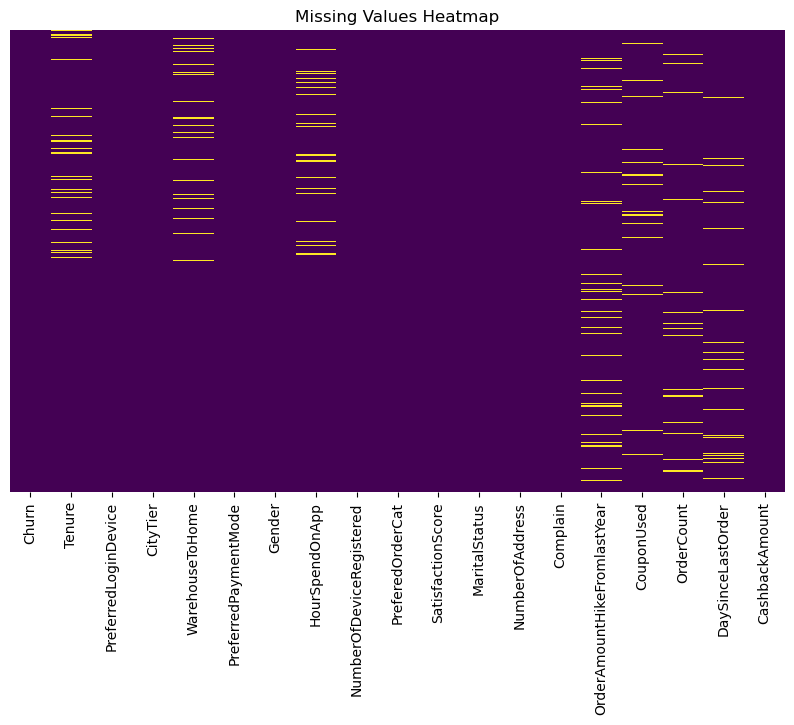

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


### **Columns with Missing Values**
Several columns have significant missing values, including:  
- `PreferredLoginDevice`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`  
- `CouponUsed`, `OrderCount`, `DaysSinceLastOrder`  

These missing values are represented by the yellow lines, indicating gaps in the dataset.

### **Columns with No Missing Values**
Some columns are entirely filled, with no visible missing data (represented by the continuous dark purple background).

### **Pattern of Missing Values**
- Missing values seem to be randomly scattered across some features.  
- Certain columns have a **higher proportion** of missing values compared to others.

In [83]:
print("\nStatistik Deskriptif:")
print(df.describe())
print(df.describe(include='object'))


Statistik Deskriptif:
             Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5630.000000  5366.000000  5630.000000      5379.000000     5375.000000   
mean      0.168384    10.189899     1.654707        15.639896        2.931535   
std       0.374240     8.557241     0.915389         8.531475        0.721926   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     2.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        14.000000        3.000000   
75%       0.000000    16.000000     3.000000        20.000000        3.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5630.000000        5630.000000      5630.000000   
mean                   3.688988           3.066785         4.214032   
std                    1.023999   

In [86]:
# Hitung persentase missing values per kolom
missing_percent = df.isnull().mean().round(4) * 100  # Pembulatan 4 digit untuk akurasi

# Tampilkan hasil
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False).apply(lambda x: f"{x:.1f}%")
print("Persentase Missing Values per Kolom:")
print(missing_percent)

Persentase Missing Values per Kolom:
DaySinceLastOrder              5.5%
OrderAmountHikeFromlastYear    4.7%
Tenure                         4.7%
OrderCount                     4.6%
CouponUsed                     4.5%
HourSpendOnApp                 4.5%
WarehouseToHome                4.5%
dtype: object


kasih penjelasan kenapa data harus diimputasi karena missing value < 5%

In [87]:
# Daftar semua kolom dengan missing values
missing_cols = ['PreferredLoginDevice','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear', 'CouponUsed','OrderCount','DaySinceLastOrder']

# Cek jumlah missing values
print("Jumlah missing values sebelum penanganan:")
print(df[missing_cols].isnull().sum())


# Imputasi untuk Kategorikal
# Kolom kategorikal
df['PreferredLoginDevice'].fillna(
    df['PreferredLoginDevice'].mode()[0],  # Isi dengan modus
    inplace=True
)


# Imputasi untuk Numerikal
# Kolom numerik
num_cols = [
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
]

for col in num_cols:
    # Imputasi dengan median
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    
    # Validasi
    assert df[col].isnull().sum() == 0, f"Masih ada missing values di {col}"


# Verifikasi 

print("\nJumlah missing values setelah penanganan:")
print(df[missing_cols].isnull().sum().sum())  # Harus 0

Jumlah missing values sebelum penanganan:
PreferredLoginDevice             0
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

Jumlah missing values setelah penanganan:
0


In [88]:
print("\nStatistik Deskriptif:")
print(df.describe())
print(df.describe(include='object'))


Statistik Deskriptif:
             Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5630.000000  5366.000000  5630.000000      5630.000000     5630.000000   
mean      0.168384    10.189899     1.654707        15.566785        2.934636   
std       0.374240     8.557241     0.915389         8.345961        0.705528   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     2.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        14.000000        3.000000   
75%       0.000000    16.000000     3.000000        20.000000        3.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5630.000000        5630.000000      5630.000000   
mean                   3.688988           3.066785         4.214032   
std                    1.023999   